In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitrox/healthcare-provider-fraud-detection-analysis")

print("Path to dataset files:", path)

100%|██████████| 25.4M/25.4M [00:01<00:00, 14.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1


In [ ]:
import os
import pandas as pd


d={}
# Assuming 'path' variable from previous code holds the directory path
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        print(filepath)
        try:
            df = pd.read_csv(filepath)
            print(f"Successfully opened: {filename}")
            # Now you can work with the dataframe 'df'
            # For example, print the first few rows:
            # print(df.head())
            d[filename]=df
        except pd.errors.ParserError:
            print(f"Error parsing CSV: {filename}")
        except Exception as e:  # Catch other potential errors
            print(f"An error occurred while opening {filename}: {e}")


/root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1/Train_Outpatientdata-1542865627584.csv
Successfully opened: Train_Outpatientdata-1542865627584.csv
/root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1/Train-1542865627584.csv
Successfully opened: Train-1542865627584.csv
/root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1/Test-1542969243754.csv
Successfully opened: Test-1542969243754.csv
/root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1/Train_Beneficiarydata-1542865627584.csv
Successfully opened: Train_Beneficiarydata-1542865627584.csv
/root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/versions/1/Test_Outpatientdata-1542969243754.csv
Successfully opened: Test_Outpatientdata-1542969243754.csv
/root/.cache/kagglehub/datasets/rohitrox/healthcare-provider-fraud-detection-analy

In [ ]:
df1=d['Train_Outpatientdata-1542865627584.csv']

df2=d['Train_Inpatientdata-1542865627584.csv']

df3=d['Train-1542865627584.csv']

In [ ]:
df1=df1.head(10000)
df2=df2.head(10000)
df3=df3.head(10000)
import pandas as pd
merged_df = pd.merge(df1, df3, on='Provider', how='inner')

merged_df = pd.merge(merged_df, df2, on='Provider', how='inner')


In [ ]:
merged_df=merged_df[:10000]

In [ ]:
for i in merged_df.columns:
  print(i)

BeneID_x
ClaimID_x
ClaimStartDt_x
ClaimEndDt_x
Provider
InscClaimAmtReimbursed_x
AttendingPhysician_x
OperatingPhysician_x
OtherPhysician_x
ClmDiagnosisCode_1_x
ClmDiagnosisCode_2_x
ClmDiagnosisCode_3_x
ClmDiagnosisCode_4_x
ClmDiagnosisCode_5_x
ClmDiagnosisCode_6_x
ClmDiagnosisCode_7_x
ClmDiagnosisCode_8_x
ClmDiagnosisCode_9_x
ClmDiagnosisCode_10_x
ClmProcedureCode_1_x
ClmProcedureCode_2_x
ClmProcedureCode_3_x
ClmProcedureCode_4_x
ClmProcedureCode_5_x
ClmProcedureCode_6_x
DeductibleAmtPaid_x
ClmAdmitDiagnosisCode_x
PotentialFraud
BeneID_y
ClaimID_y
ClaimStartDt_y
ClaimEndDt_y
InscClaimAmtReimbursed_y
AttendingPhysician_y
OperatingPhysician_y
OtherPhysician_y
AdmissionDt
ClmAdmitDiagnosisCode_y
DeductibleAmtPaid_y
DischargeDt
DiagnosisGroupCode
ClmDiagnosisCode_1_y
ClmDiagnosisCode_2_y
ClmDiagnosisCode_3_y
ClmDiagnosisCode_4_y
ClmDiagnosisCode_5_y
ClmDiagnosisCode_6_y
ClmDiagnosisCode_7_y
ClmDiagnosisCode_8_y
ClmDiagnosisCode_9_y
ClmDiagnosisCode_10_y
ClmProcedureCode_1_y
ClmProcedureCo

In [ ]:


merged_df = merged_df.drop_duplicates()

print(merged_df.shape)

(10000, 57)


In [ ]:
missing_percentage = merged_df.isnull().mean() * 100

# Display the result
print(missing_percentage)

BeneID_x                      0.00
ClaimID_x                     0.00
ClaimStartDt_x                0.00
ClaimEndDt_x                  0.00
Provider                      0.00
InscClaimAmtReimbursed_x      0.00
AttendingPhysician_x          0.06
OperatingPhysician_x         83.53
OtherPhysician_x             61.70
ClmDiagnosisCode_1_x          2.94
ClmDiagnosisCode_2_x         42.32
ClmDiagnosisCode_3_x         60.40
ClmDiagnosisCode_4_x         74.27
ClmDiagnosisCode_5_x         84.76
ClmDiagnosisCode_6_x         89.66
ClmDiagnosisCode_7_x         92.58
ClmDiagnosisCode_8_x         95.62
ClmDiagnosisCode_9_x         97.32
ClmDiagnosisCode_10_x       100.00
ClmProcedureCode_1_x        100.00
ClmProcedureCode_2_x        100.00
ClmProcedureCode_3_x        100.00
ClmProcedureCode_4_x        100.00
ClmProcedureCode_5_x        100.00
ClmProcedureCode_6_x        100.00
DeductibleAmtPaid_x           0.00
ClmAdmitDiagnosisCode_x      82.03
PotentialFraud                0.00
BeneID_y            

In [ ]:


import pandas as pd

# ... (Your existing code) ...

threshold = 85  # Define the threshold for missing value percentage

# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isnull().mean() * 100

# Identify columns with more than the threshold percentage of missing values
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns
merged_df = merged_df.drop(columns=columns_to_drop)

print(merged_df.shape)
merged_df.columns


(10000, 39)


Index(['BeneID_x', 'ClaimID_x', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider',
       'InscClaimAmtReimbursed_x', 'AttendingPhysician_x',
       'OperatingPhysician_x', 'OtherPhysician_x', 'ClmDiagnosisCode_1_x',
       'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x',
       'ClmDiagnosisCode_5_x', 'DeductibleAmtPaid_x',
       'ClmAdmitDiagnosisCode_x', 'PotentialFraud', 'BeneID_y', 'ClaimID_y',
       'ClaimStartDt_y', 'ClaimEndDt_y', 'InscClaimAmtReimbursed_y',
       'AttendingPhysician_y', 'OperatingPhysician_y', 'AdmissionDt',
       'ClmAdmitDiagnosisCode_y', 'DeductibleAmtPaid_y', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y',
       'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4_y', 'ClmDiagnosisCode_5_y',
       'ClmDiagnosisCode_6_y', 'ClmDiagnosisCode_7_y', 'ClmDiagnosisCode_8_y',
       'ClmDiagnosisCode_9_y', 'ClmProcedureCode_1_y'],
      dtype='object')

In [ ]:


import pandas as pd
# Iterate through each column in the DataFrame
for column in merged_df.columns:
    # Check if the column is of a numeric type
    if pd.api.types.is_numeric_dtype(merged_df[column]):
        # Calculate the mode (most frequent value) for the column, excluding NaN values
        mode_value = merged_df[column].mode(dropna=True)

        # If the mode has a value, fill NaN values with it
        if not mode_value.empty:
            merged_df[column].fillna(mode_value[0], inplace=True)
    else:
        # For non-numeric columns (likely categorical), fill NaN with the most frequent value (mode)
        mode_value = merged_df[column].mode(dropna=True)
        if not mode_value.empty:
          merged_df[column].fillna(mode_value[0], inplace=True)


<ipython-input-10-ba3b14bfcf41>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(mode_value[0], inplace=True)
<ipython-input-10-ba3b14bfcf41>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# prompt: percentage of missing values in each column

missing_percentage = merged_df.isnull().mean() * 100
missing_percentage


,0
BeneID_x,0.0
ClaimID_x,0.0
ClaimStartDt_x,0.0
ClaimEndDt_x,0.0
Provider,0.0
InscClaimAmtReimbursed_x,0.0
AttendingPhysician_x,0.0
OperatingPhysician_x,0.0
OtherPhysician_x,0.0
ClmDiagnosisCode_1_x,0.0


In [ ]:
pd.set_option('display.max_columns', None)
merged_df.head(5)

,BeneID_x,ClaimID_x,ClaimStartDt_x,ClaimEndDt_x,Provider,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,ClmDiagnosisCode_5_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,PotentialFraud,BeneID_y,ClaimID_y,ClaimStartDt_y,ClaimEndDt_y,InscClaimAmtReimbursed_y,AttendingPhysician_y,OperatingPhysician_y,AdmissionDt,ClmAdmitDiagnosisCode_y,DeductibleAmtPaid_y,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,ClmDiagnosisCode_5_y,ClmDiagnosisCode_6_y,ClmDiagnosisCode_7_y,ClmDiagnosisCode_8_y,ClmDiagnosisCode_9_y,ClmProcedureCode_1_y
0,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY380867,PHY358876,1828,515,42731,4019,25000,0,V0481,Yes,BENE12390,CLM41473,2009-03-07,2009-03-08,6000,PHY372869,PHY429430,2009-03-07,78605,1068.0,2009-03-08,305,4280,4148,V1251,4019,41400,25000,79029,2724,V5861,3995.0
1,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY380867,PHY358876,1828,515,42731,4019,25000,0,V0481,Yes,BENE26429,CLM51334,2009-05-16,2009-05-18,3000,PHY311624,PHY399012,2009-05-16,5789,1068.0,2009-05-18,326,53551,71515,2449,56210,25000,42731,56400,4019,4019,4523.0
2,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY380867,PHY358876,1828,515,42731,4019,25000,0,V0481,Yes,BENE30660,CLM53116,2009-05-28,2009-06-01,4000,PHY400645,PHY429430,2009-05-28,7840,1068.0,2009-06-01,073,4359,7843,78321,4019,V1582,78659,3659,2724,4019,3995.0
3,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY380867,PHY358876,1828,515,42731,4019,25000,0,V0481,Yes,BENE34402,CLM56165,2009-06-18,2009-06-24,11000,PHY400645,PHY375925,2009-06-18,0389,1068.0,2009-06-24,856,0389,5849,49121,3481,486,4019,2639,78552,78791,9702.0
4,BENE11004,CLM529356,2009-08-17,2009-08-17,PRV55951,60,PHY381511,PHY380867,PHY358876,1828,515,42731,4019,25000,0,V0481,Yes,BENE35908,CLM55026,2009-06-10,2009-06-12,11000,PHY408250,PHY428833,2009-06-10,42781,1068.0,2009-06-12,252,42789,56210,28521,41400,53540,33818,2724,60000,412,3771.0


In [ ]:
merged_df.drop(columns=['BeneID_x','ClaimID_x','Provider','BeneID_y','ClaimID_y'], inplace=True)

In [ ]:
merged_df['ClaimStartDt_x'] = pd.to_datetime(merged_df['ClaimStartDt_x'])
merged_df['ClaimEndDt_x'] = pd.to_datetime(merged_df['ClaimEndDt_x'])

# Calculate the difference and store it in a new column 'DateDiff'
merged_df['ClaimDur_x'] = (merged_df['ClaimEndDt_x'] - merged_df['ClaimStartDt_x']).dt.days



In [ ]:
merged_df['ClaimStartDt_y'] = pd.to_datetime(merged_df['ClaimStartDt_y'])
merged_df['ClaimEndDt_y'] = pd.to_datetime(merged_df['ClaimEndDt_y'])

# Calculate the difference and store it in a new column 'DateDiff'
merged_df['ClaimDur_y'] = (merged_df['ClaimEndDt_y'] - merged_df['ClaimStartDt_y']).dt.days


In [ ]:
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'])
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'])

# Calculate the difference and store it in a new column 'DateDiff'
merged_df['Stay_Time'] = (merged_df['DischargeDt'] - merged_df['AdmissionDt']).dt.days

In [ ]:
merged_df.drop(columns=['ClaimStartDt_y','ClaimEndDt_y','ClaimStartDt_x','ClaimEndDt_x','AdmissionDt','DischargeDt'], inplace=True)

In [ ]:
columns_to_encode = ['OperatingPhysician_x','AttendingPhysician_x','OtherPhysician_x','PotentialFraud','AttendingPhysician_y','OperatingPhysician_y','ClmDiagnosisCode_1_x','ClmDiagnosisCode_2_x','ClmDiagnosisCode_3_x','ClmDiagnosisCode_4_x','ClmDiagnosisCode_5_x','ClmAdmitDiagnosisCode_x','ClmDiagnosisCode_1_y','ClmDiagnosisCode_2_y','ClmDiagnosisCode_3_y','ClmDiagnosisCode_4_y','ClmDiagnosisCode_5_y','ClmDiagnosisCode_6_y','ClmDiagnosisCode_7_y','ClmDiagnosisCode_8_y','ClmDiagnosisCode_9_y','ClmAdmitDiagnosisCode_y','DiagnosisGroupCode']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each column in the list
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Display the modified DataFrame
print(merged_df)

      InscClaimAmtReimbursed_x  AttendingPhysician_x  OperatingPhysician_x  \
0                           60                   369                    66   
1                           60                   369                    66   
2                           60                   369                    66   
3                           60                   369                    66   
4                           60                   369                    66   
...                        ...                   ...                   ...   
9995                       400                   479                    66   
9996                       400                   479                    66   
9997                       400                   479                    66   
9998                       400                   479                    66   
9999                       400                   479                    66   

      OtherPhysician_x  ClmDiagnosisCode_1_x  ClmDiagnosisCode_

In [ ]:
tgt=merged_df['PotentialFraud']
merged_df.drop(columns=['PotentialFraud'], inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df, tgt, test_size=0.2, random_state=42)



In [ ]:
for i in X_train.columns:
  print(i)

InscClaimAmtReimbursed_x
AttendingPhysician_x
OperatingPhysician_x
OtherPhysician_x
ClmDiagnosisCode_1_x
ClmDiagnosisCode_2_x
ClmDiagnosisCode_3_x
ClmDiagnosisCode_4_x
ClmDiagnosisCode_5_x
DeductibleAmtPaid_x
ClmAdmitDiagnosisCode_x
InscClaimAmtReimbursed_y
AttendingPhysician_y
OperatingPhysician_y
ClmAdmitDiagnosisCode_y
DeductibleAmtPaid_y
DiagnosisGroupCode
ClmDiagnosisCode_1_y
ClmDiagnosisCode_2_y
ClmDiagnosisCode_3_y
ClmDiagnosisCode_4_y
ClmDiagnosisCode_5_y
ClmDiagnosisCode_6_y
ClmDiagnosisCode_7_y
ClmDiagnosisCode_8_y
ClmDiagnosisCode_9_y
ClmProcedureCode_1_y
ClaimDur_x
ClaimDur_y
Stay_Time


,AttendingPhysician_x,ClmDiagnosisCode_1_x,AttendingPhysician_y,ClmDiagnosisCode_2_x,InscClaimAmtReimbursed_x,ClmDiagnosisCode_3_x,OperatingPhysician_y,ClmDiagnosisCode_2_y,OtherPhysician_x,ClmDiagnosisCode_5_y,ClmDiagnosisCode_7_y,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_3_y,ClmAdmitDiagnosisCode_y,tgt
AttendingPhysician_x,1.000000,0.012289,0.000403,0.034614,0.008704,0.023739,-0.000047,0.008284,0.113654,0.001220,-0.012971,0.023143,-0.002972,-0.007618,-0.002759,0.015337
ClmDiagnosisCode_1_x,0.012289,1.000000,0.034350,0.077322,-0.050058,-0.076652,0.048456,0.016864,0.038057,0.017813,0.006643,-0.009516,-0.007950,0.006805,-0.003053,-0.044662
AttendingPhysician_y,0.000403,0.034350,1.000000,0.012742,0.079149,-0.008965,0.147991,0.034015,-0.000020,-0.000425,-0.033901,0.008440,-0.028860,0.025973,0.003789,0.127184
ClmDiagnosisCode_2_x,0.034614,0.077322,0.012742,1.000000,-0.028619,0.165090,-0.008350,-0.006224,-0.071667,-0.000389,0.019602,-0.004720,-0.002294,-0.003403,-0.008272,0.010410
InscClaimAmtReimbursed_x,0.008704,-0.050058,0.079149,-0.028619,1.000000,-0.001325,0.034087,0.012343,0.010885,-0.003261,-0.018247,-0.005951,-0.000583,0.003032,-0.003730,0.001426
ClmDiagnosisCode_3_x,0.023739,-0.076652,-0.008965,0.165090,-0.001325,1.000000,-0.016332,-0.020114,0.073895,-0.000508,0.000165,-0.019649,-0.000872,-0.005216,-0.004780,0.021836
OperatingPhysician_y,-0.000047,0.048456,0.147991,-0.008350,0.034087,-0.016332,1.000000,-0.021290,-0.006408,-0.057009,0.005789,-0.021608,-0.062559,0.000363,-0.011975,0.007552
ClmDiagnosisCode_2_y,0.008284,0.016864,0.034015,-0.006224,0.012343,-0.020114,-0.021290,1.000000,0.008869,0.028077,-0.060318,0.024124,0.022511,-0.000158,0.014301,-0.026551
OtherPhysician_x,0.113654,0.038057,-0.000020,-0.071667,0.010885,0.073895,-0.006408,0.008869,1.000000,-0.010550,0.002977,-0.000041,-0.005212,0.023435,-0.001589,-0.008673
ClmDiagnosisCode_5_y,0.001220,0.017813,-0.000425,-0.000389,-0.003261,-0.000508,-0.057009,0.028077,-0.010550,1.000000,0.059802,-0.002842,0.051287,0.028280,0.033591,-0.027537


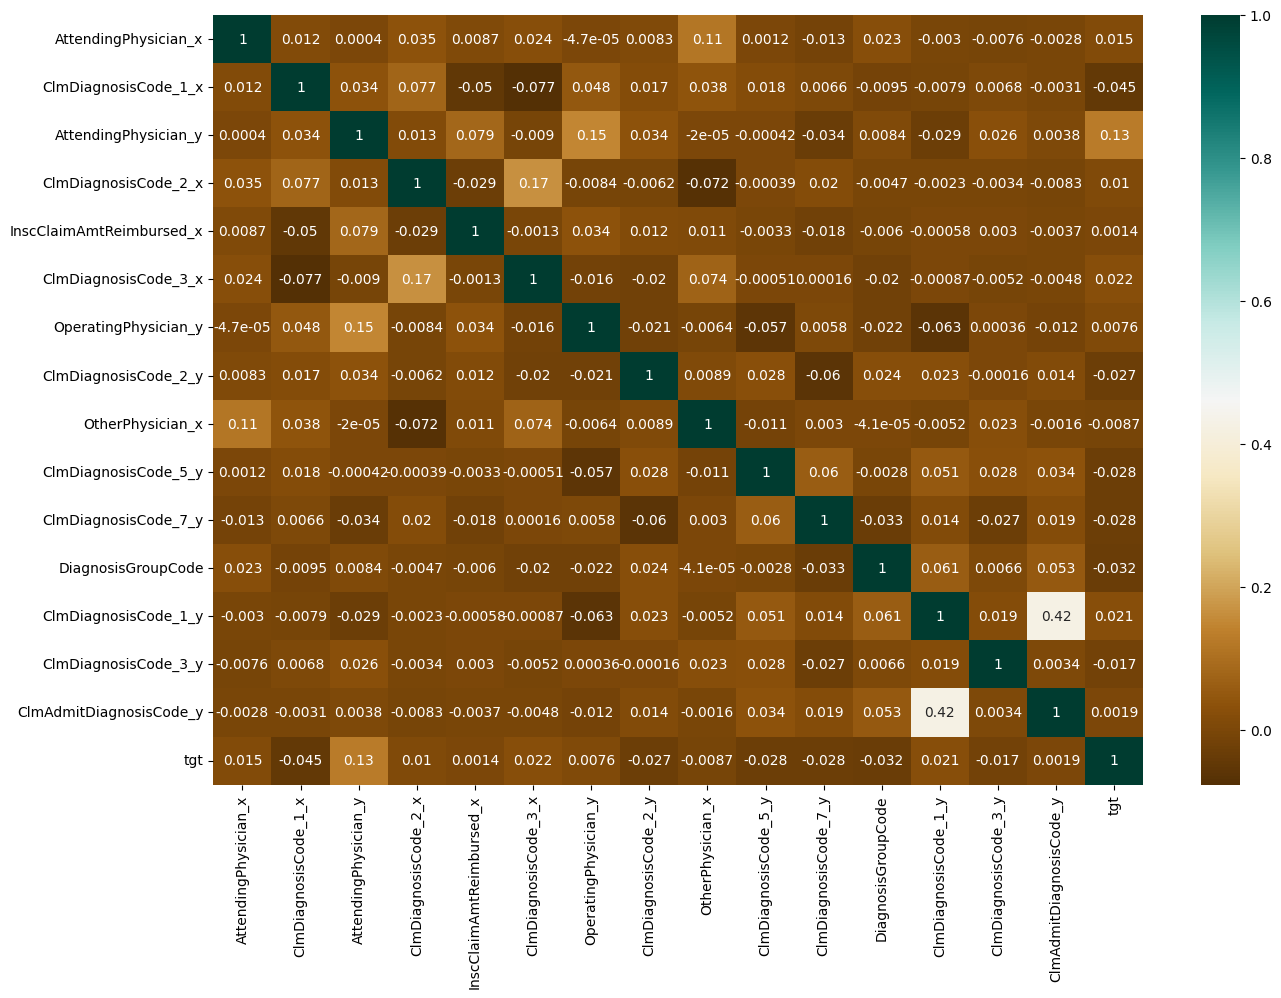

In [ ]:
#EDA

#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
df=X_train

df['tgt']=y_train

plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#Attending_Physician_y has high correlation with target variable.

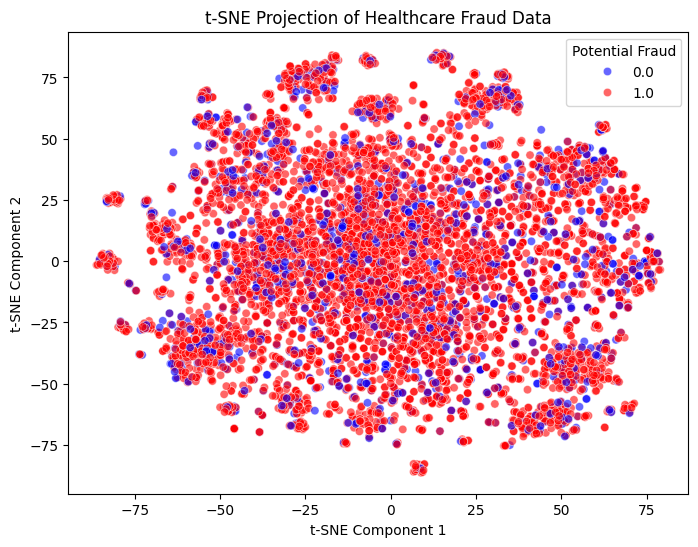

In [ ]:
pd.set_option('display.max_columns', None)
X_train.head(5)

,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,ClmDiagnosisCode_5_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,InscClaimAmtReimbursed_y,AttendingPhysician_y,OperatingPhysician_y,ClmAdmitDiagnosisCode_y,DeductibleAmtPaid_y,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,ClmDiagnosisCode_5_y,ClmDiagnosisCode_6_y,ClmDiagnosisCode_7_y,ClmDiagnosisCode_8_y,ClmDiagnosisCode_9_y,ClmProcedureCode_1_y,ClaimDur_x,ClaimDur_y,Stay_Time
9254,40,528,66,251,472,61,57,32,7,0,90,12000,1155,679,289,1068.0,113,377,3,455,368,274,494,567,478,58,9671.0,0,4,4
1561,2700,644,66,271,532,36,91,19,7,0,85,11000,480,344,55,1068.0,270,439,241,252,237,233,242,227,229,201,4869.0,14,3,3
1670,600,137,66,251,158,18,89,18,26,0,85,13000,1185,934,503,1068.0,161,258,778,137,319,448,357,101,60,328,3995.0,1,4,4
6087,3300,60,14,116,38,92,4,88,38,0,85,4000,451,880,459,1068.0,138,350,503,130,779,163,72,202,524,55,9955.0,0,2,2
6669,40,365,66,251,519,61,57,32,7,0,85,33000,81,161,283,1068.0,122,391,37,114,266,14,375,227,440,111,966.0,0,19,19


In [ ]:
for col in X_train.columns:
    print(f"Unique values in column '{col}':")
    print(X_train[col].unique())
    print("-" * 20)


Unique values in column 'InscClaimAmtReimbursed_x':
[  40 2700  600 3300   80  100   90  240 1600  200   10  300    0 1100
  700   20  500  400 1000   50   60  800   30 1900  900 2100 2200 2400
   70  260 1200 1800 2800 9020 2000 1700 1400 2600 1500 2500]
--------------------
Unique values in column 'AttendingPhysician_x':
[528 644 137  60 365 401 449 552 576 637  67 245 351 370  70 545 156 668
 399  24  17 256  83 375 330 450  35 149 362 217 246 165 503  47 641 233
 339 489 188 678 408 685 299 136 453 274  76 357 679 537 413 242 116 226
  97 463  36 551 216 406 100 273 161 634 614 437  86 592  34 441 294 289
 366 666 703 578 134 200 121 259  30 143  99 383 114 278 135 312   3 654
 653 250 331 248  94 693 346 546 173 382 423 280 305 687 309 414 243 495
 265  40   9 227 107 166 569 389 689 640 606 282 358 140 208 224 524 593
 212 402 664  69 287 240 199 288 627 434 554 207  31 342 428 113 251 613
 487 602  88   5 400 170  79 336 541 508 191 632 563 310 642 307  42 603
 238 182 195 127 5

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance_df


,Feature,Importance
1,AttendingPhysician_x,0.080321
4,ClmDiagnosisCode_1_x,0.078822
12,AttendingPhysician_y,0.077101
5,ClmDiagnosisCode_2_x,0.052835
0,InscClaimAmtReimbursed_x,0.049588
6,ClmDiagnosisCode_3_x,0.043783
13,OperatingPhysician_y,0.041108
18,ClmDiagnosisCode_2_y,0.038529
3,OtherPhysician_x,0.036960
21,ClmDiagnosisCode_5_y,0.033814


In [ ]:
top_15_features = feature_importance_df.head(15)['Feature'].tolist()

top_15_features


['AttendingPhysician_x',
 'ClmDiagnosisCode_1_x',
 'AttendingPhysician_y',
 'ClmDiagnosisCode_2_x',
 'InscClaimAmtReimbursed_x',
 'ClmDiagnosisCode_3_x',
 'OperatingPhysician_y',
 'ClmDiagnosisCode_2_y',
 'OtherPhysician_x',
 'ClmDiagnosisCode_5_y',
 'ClmDiagnosisCode_7_y',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1_y',
 'ClmDiagnosisCode_3_y',
 'ClmAdmitDiagnosisCode_y']

In [ ]:
X_train=X_train[top_15_features]
X_test=X_test[top_15_features]

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # You can adjust hyperparameters as needed
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:42:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred=xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9785


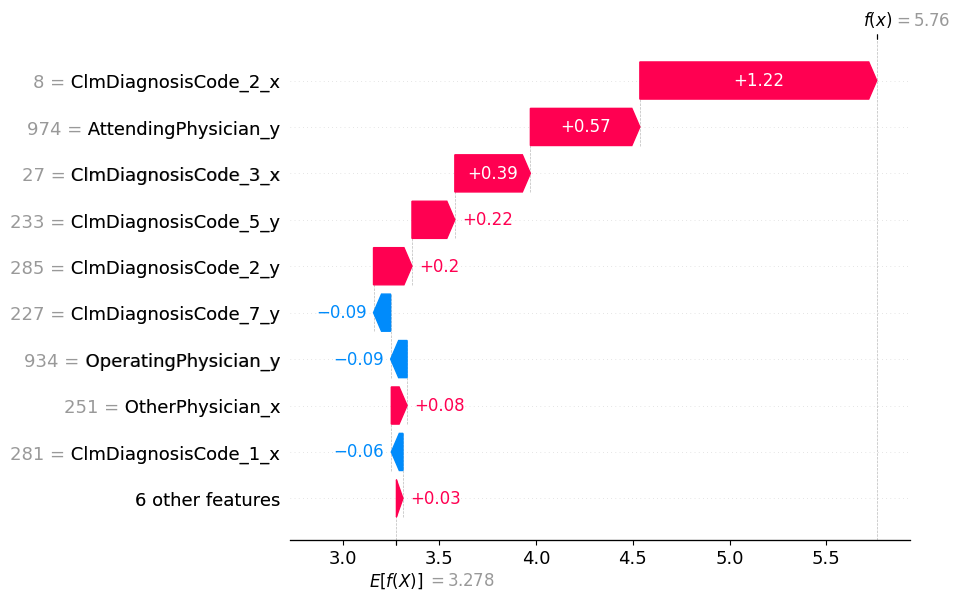

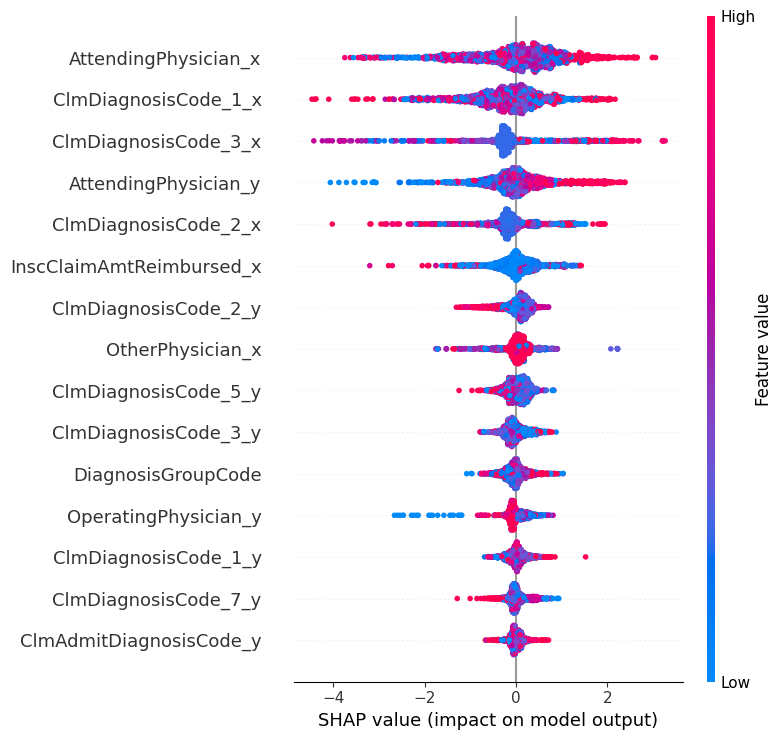

In [ ]:
!pip install shap

import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("InscClaimAmtReimbursed", shap_values.values, X_test)
